# Hypothesis Testing and Experimental Design: Part 1

## The Lady Tasting Tea

![Ronald Fisher in 1913](../images/ronaldfisher.jpg "Ronald Fisher in 1913")

As the story goes, Sir Ronald Fisher met with a pair of friends in early 1920. He prepares a cup of tea and offers it to his friend, Dr. Muriel Bristol. Dr Bristol declines it, saying that she prefers tea into which the milk has been poured first. After Fisher hears this, he apparently responds with "Nonsense. Surely it makes no difference." and his other guest, William Roach, immediately offers "Let's test her." There is no record as to why Dr Bristol was spending her time with such charmers, but perhaps that's besides the point; not long after this she marries Mr Roach.

In any case, Fisher immediately creates an experiment to test Dr Bristol's claim. He arranges for several cups of tea to be prepared, with half having the milk poured first and the other half having the tea poured first. Logically, he reasons, if Dr Bristol was simply guessing then she would still correctly identify some number of the cups as being "tea first" or "milk first". However, if she really did have some form of expertise, then she should be able to correctly identify tea or milk first significantly more often than pure luck would allow. Using Fisher's logic and the vocabulary that he would later use to describe the experiment, the "null" hypothesis is that Dr Bristol has no special tea discriminating ability and is guessing. His test (later known as Fisher's exact test after Sir Ronald publishes this story and singlehandedly invents the field of Experimental Design) uses a simple test statistic: a simple count of the number of successes in selecting the cups of tea.

In the end, Dr Bristol correctly identifies all of the cups and Fisher accepts that she is not likely to be guessing. What was his logic?

## The Binomial Distribution

Before we get to come back to tea, let's take a moment to think about flipping coins. Flipping coins isn't terribly exciting, but it turns out to be a 'model' that we can use to develop insight into a **lot** of different real-world events that are much more interesting than coin flipping, for instance drinking tea.

Anyway, let's pretend for a moment that the government chose to mint unfair coins for some reason, perhaps as a practical joke or perhaps to provide validity to statistician's life choices. Either way, in this context 'unfair' means that the probability of flipping the coin and having it come up heads is not 50%, or 0.50. Instead it's so unfair that it could come up with any valid probability `p` between 0 and 1, inclusive.

If we were to start flipping this coin, the we know that the probability of it coming up heads is `p`. We also know that if we can assume that what happens on each coin flip is independent, then the probability of flipping it twice and having it come up heads twice is $p^{2}$. On the other hand if we obtained a HEAD and then a TAIL, using the same properties of probability, the probability of this sequence is $p (1-p)$. Why is that? Well, the probability of getting the head on the first flip is `p` and the probability of getting the tail on the second flip is $(1-p)$ since the coin can either come up heads or tails. Combining the two we get that the probability of HEAD-TAIL is $p (1-p)$.

Let's take a step back for a second and think about what that means. One way to think about probability is to interpret this result as meaning the following: I'm going to run a huge number of coin flipping experiments. In each of these experiments I'm going to flip the coin exactly twice. I'm going to keep track of how many of these experiments result in exactly the sequence HEAD-TAIL. When I'm done, $p (1-p)$ percent of these experiments will come up HEAD-TAIL.

Okay, so great. Does that help? Probably not because the probability of getting the specific sequence HEAD-TAIL may or may not be interesting. But what if we ask a slightly different question? Rather than asking about the probability of flipping the coin and getting HEAD-TAIL, what if we ask "If I run a huge number of experiments where I flip this unfair coin twice, in how many of those experiments will it come up HEAD some exact number of times, say once?" What's the difference between this question and our first question? If we pose our question in terms of the number of times a HEAD comes up, then the probability that we obtain exactly one HEAD is equal to the sum of the probabilitys for every sequence of coin flips that come up with exactly one head. In other words

$$
\begin{aligned}
 P(\# HEADS == 1) &= Prob(HEAD-TAIL) + Prob(TAIL-HEAD) \\
                  &= p(1-p) + (1-p)p \\
                  &= 2p(1-p)
\end{aligned}
$$

In fact, we can talk about this more generally. If we flip our unfair coin $N$ times, then the number of times our coin comes up HEADS exactly $k$ times is given by:

$$
P(\# HEADS == k) = \frac{N!}{k! (N-k)!} p^{k}(1-p)^{N-k}
$$

where the `!` represents the factorial function.

Examining this expression, you can see that the $p^k$ represents the $k$ flips that came up HEAD and that $(1-p)^(N-k)$ represents the remaining flips, which much have come up tails. The funny expression with the factorials is counting the number of sequences that have exactly $k$ HEAD.

The probability distribution we just derived by flipping coins is called the **Binomial Distribution** (because that thing involving the factorials comes up so frequently that it's been given a name, ie. the binomial coefficient). While coin flipping may not be terribly exciting by itself, we can think of that coin flipping process as being a surrogate for **any** process in which we want to keep track of some notion of success / failure. For instance, instead of thinking $N$ coin flips and $k$ heads, we can use it think of a baseball season with $N$ games and a team winning $k$ times. If we were so inclined, we could use it to model someone clicking on a button or not clicking on a button. Or, as it turns out, we could use it to model a tea drinking ninja, which is exactly what Sir Ronald Fisher did.

## The Boilerplate

In [1]:
%matplotlib inline

In [2]:
from math import factorial
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('fivethirtyeight')

## The Computation

Although Fisher actually used eight cups of tea in his experiment, let's use 10 for ours just for simplicity. If we do so, then we can  use the Binomial Distribution to determine how many cups (out of 10) a random guesser would correctly identify. For the sake of argument, let's say that anyone who is randomly guessing would have a 50% probability of correctly identifying any individual cup.

Of her 10 opportunities, how many must Dr Bristol correctly identify before we say that she is legitimately skilled?

In [3]:
# let's define the "choose" function, which represents how many times
# we'll get r heads in n tosses
def nCr(n,r):
    return factorial(n) / (factorial(r) * factorial(n-r))

#
def binomialCDF(p,n,k):
    return nCr(n,k)*(p**k)*((1-p)**(n-k))

In [4]:
# let's set up out experiment
prob_guessing = 0.5
prob_skilled = 0.8
num_flips  = 10

In [5]:
# let's create a few lists to collect our results
guess = list()            # this will the probability of getting num_heads heads
guess_cum = list()        # this will the probability of getting [1:num_heads] heads

# print a header
print '# CORRECT','\tPROB\tCUM'
for num_heads in range(0,num_flips+1):

    # collect up our data as we go
    guess.append(binomialCDF(prob_guessing, num_flips, num_heads))

    # accumulate the cumulative probabilities
    if (num_heads == 0) :
        guess_cum.append(guess[num_heads])

    else:
        guess_cum.append(guess_cum[num_heads-1] + guess[num_heads])

    print '{}\t\t{:1.4f}\t{:1.4f}'.format(num_heads, guess[num_heads], guess_cum[num_heads])

# CORRECT 	PROB	CUM
0		0.0010	0.0010
1		0.0098	0.0107
2		0.0439	0.0547
3		0.1172	0.1719
4		0.2051	0.3770
5		0.2461	0.6230
6		0.2051	0.8281
7		0.1172	0.9453
8		0.0439	0.9893
9		0.0098	0.9990
10		0.0010	1.0000


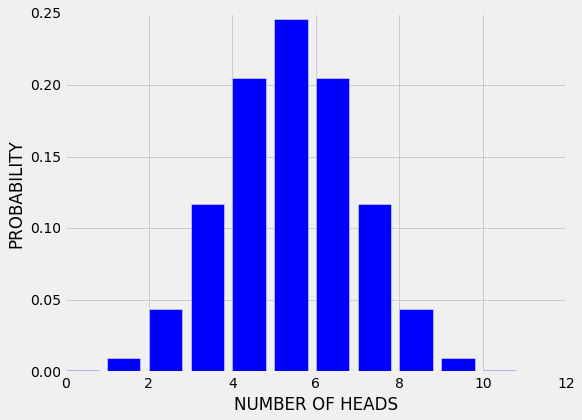

In [6]:
# plot the results
plt.figure(figsize=(8,6))

# this time, I also want the filled area corresponding to the p-value
plt.bar(range(num_flips+1),guess);
#plt.step(range(num_flips+1),guess_cum, where='post');
plt.xlabel('NUMBER OF HEADS')
plt.ylabel('PROBABILITY')

## Thinking About The Results

Let's stop at this point and think about these results.

* What is it saying that the cumulative probability for $ X \le 7 $ is 94.5%?
* What is it saying that the cumulative probability for $ X = 10 $ is 0.1%?

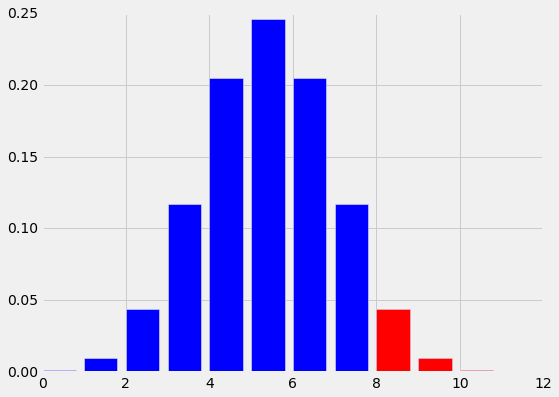

In [7]:
# plot the results
plt.figure(figsize=(8,6))

# this time, I also want the filled area corresponding to the p-value
plt.bar(range(num_flips+1),guess);
# plt.step(range(num_flips+1),guess_cum, where='post');
plt.bar(range(8,11),guess[8:11],color='r');

## Introducing the "P-Value"

In [8]:
# let's create a few lists to collect our results
pvalue=list()

print '# CORRECT','\tPROB\tCUM\tPVALUE'

for num_heads in range(0,num_flips+1):
    if (num_heads == 0) :
        pvalue.append(1)
    else:
        pvalue.append(1-guess_cum[num_heads-1])

    print '{}\t\t{:1.4f}\t{:1.4f}\t{:1.4f}'.format(num_heads,guess[num_heads],guess_cum[num_heads],pvalue[num_heads])

# CORRECT 	PROB	CUM	PVALUE
0		0.0010	0.0010	1.0000
1		0.0098	0.0107	0.9990
2		0.0439	0.0547	0.9893
3		0.1172	0.1719	0.9453
4		0.2051	0.3770	0.8281
5		0.2461	0.6230	0.6230
6		0.2051	0.8281	0.3770
7		0.1172	0.9453	0.1719
8		0.0439	0.9893	0.0547
9		0.0098	0.9990	0.0107
10		0.0010	1.0000	0.0010


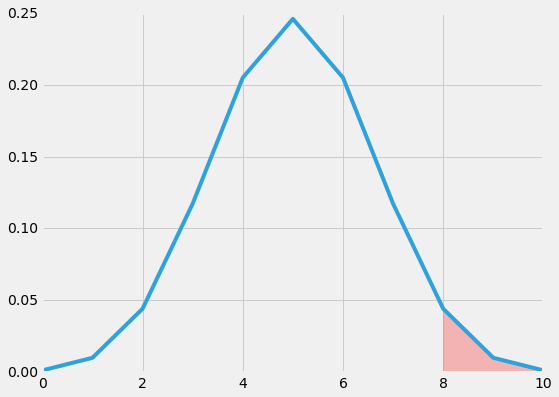

In [9]:
# plot the results
plt.figure(figsize=(8,6))

# this time, I also want the filled area corresponding to the p-value
plt.fill_between(range(8,11),guess[-3:], color='r', alpha =0.25);
plt.plot(guess);
# plt.plot(guess_cum);